In [1]:
import spock
import random
import numpy as np
import rebound
import pandas as pd
from spock import simsetup
from spock import FeatureClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl

resTestThetaAlt  tests the min func

resTestTheta normal
res1e4Theta

resThetaData

In [2]:
ResDatapath = '../../cleanData/csvs/resonant/'
RandDatapath = '../../cleanData/csvs/random/'

#data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')
#data = pd.read_csv(ResDatapath+'07-02-25-thetaSTD.csv')
#data = pd.read_csv(ResDatapath+'23-02-25-thetaSTD.csv')
data = pd.read_csv(ResDatapath+'22-03-25-thetaSTD.csv')



#rand = pd.read_csv(RandDatapath+'rand1e4Theta.csv')

/tmp/ipykernel_540073/1046660391.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(2e-2,0)
/tmp/ipykernel_540073/1046660391.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(2e-2,0)


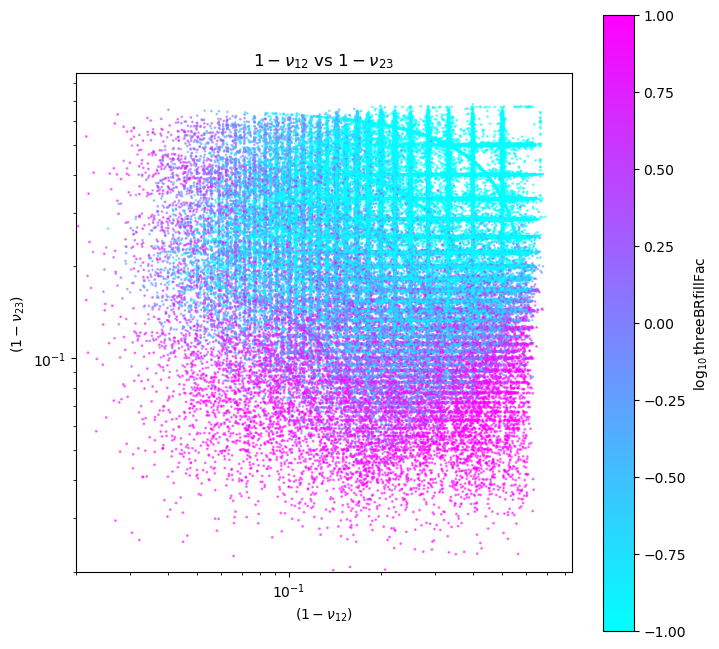

In [25]:
vmi = -1
vma = 1
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(1-data['nu12'], 1-data['nu23'], s=1, alpha = 0.5, c=np.log(data['threeBRfillfac']), cmap="cool", vmin=vmi,vmax=vma)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$(1-\nu_{12})$')
ax.set_ylabel(r'$(1-\nu_{23})$')

ax.set_aspect('equal')
ax.set_xlim(2e-2,0)
ax.set_ylim(2e-2,0)
ax.set_title(r'$1-\nu_{12}$ vs $1-\nu_{23}$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label=r'$\log_{10}$threeBRfillFac')

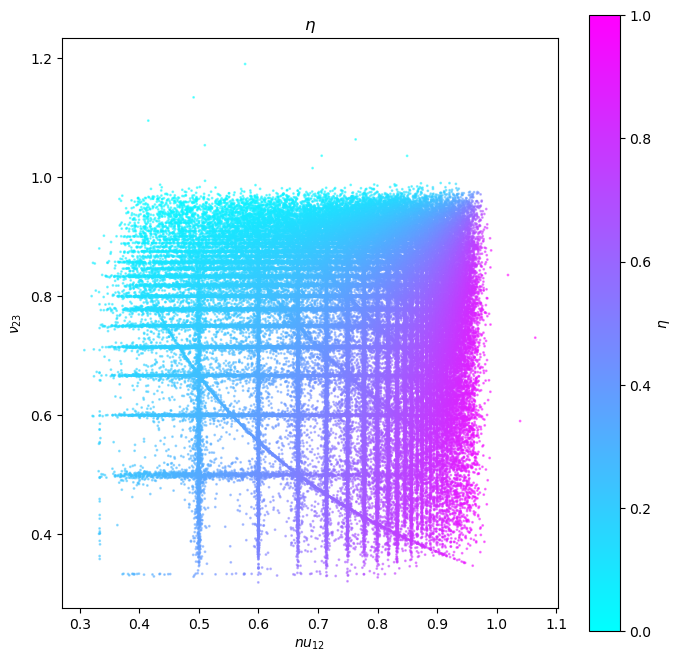

In [16]:
vmi = 0
vma = 1
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data['nu12'], data['nu23'], s=1, alpha = 0.5, c=data['eta'], cmap="cool", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$nu_{12}$')
ax.set_ylabel(r'$\nu_{23}$')

ax.set_aspect('equal')
# ax.set_xlim(2e-2,0)
# ax.set_ylim(2e-2,0)
ax.set_title(r'$\eta$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label=r'$\eta$')

In [ ]:
check = data[]

In [21]:
data['nu'].describe()

count    102497.000000
mean          0.128271
std           0.068015
min          -0.255818
25%           0.077061
50%           0.115308
75%           0.165166
max           0.485759
Name: nu, dtype: float64

In [24]:
(data['nu'] < 0)

0         False
1         False
2         False
3         False
4         False
          ...  
102492    False
102493    False
102494    False
102495    False
102496    False
Name: nu, Length: 102497, dtype: bool

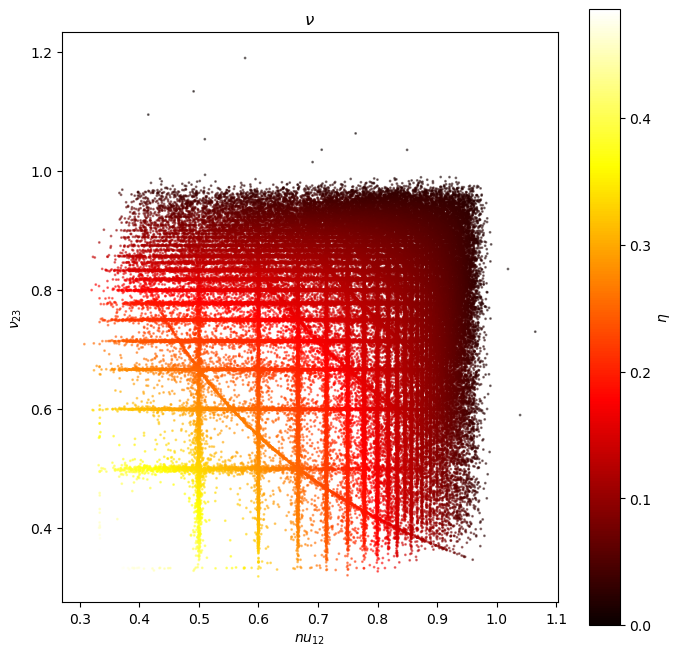

In [19]:
vmi = 0
vma = 1
fig, ax = plt.subplots(figsize=(8,8))
#vmi = np.min(data['nu'])
vma = np.max(data['nu'])

ax.scatter(data['nu12'], data['nu23'], s=1, alpha = 0.5, c=data['nu'], cmap="hot", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$nu_{12}$')
ax.set_ylabel(r'$\nu_{23}$')

ax.set_aspect('equal')
# ax.set_xlim(2e-2,0)
# ax.set_ylim(2e-2,0)
ax.set_title(r'$\nu$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='hot'),
             ax=ax, orientation='vertical', label=r'$\eta$')

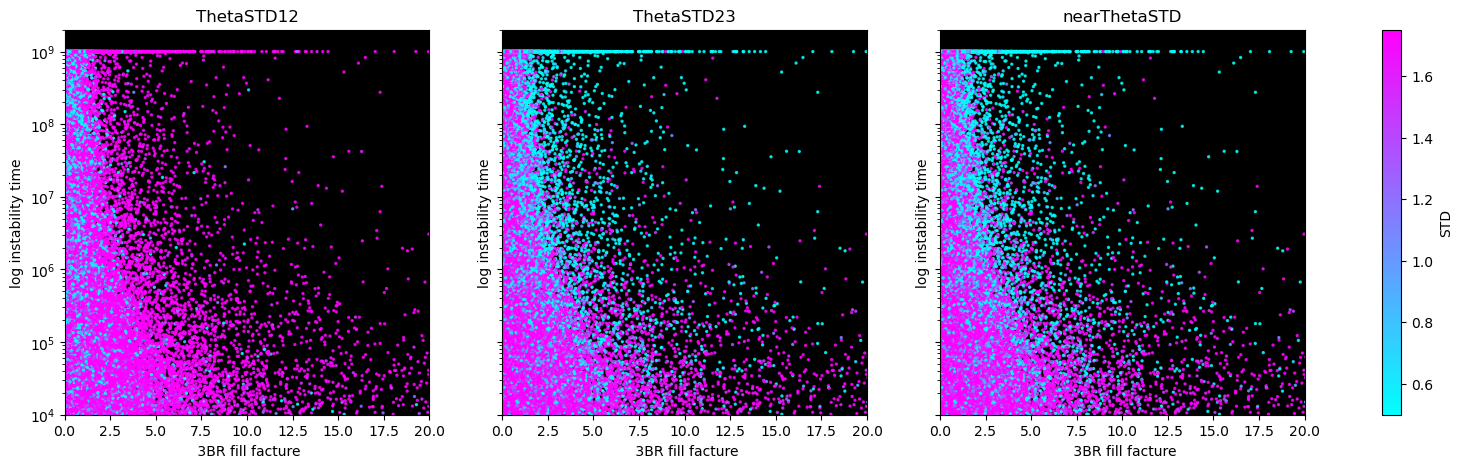

In [41]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
vmi = 0.5
vma = 1.75

tags =[ 'ThetaSTD12', 'ThetaSTD23','nearThetaSTD']

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
for i, e in enumerate(tags):
    ax[i].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[e])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
   
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([1e4,2e9])
    ax[i].set_xlabel(" 3BR fill facture")
    ax[i].set_ylabel("log instability time")
    ax[i].set_yscale('log')
    #cbar.set_label('close body conjunction angle std')
    ax[i].set_facecolor("black")
    ax[i].set_title(e)

In [26]:
specific = data[(data['threeBRfillfac'] > 3) & (data['instability_time']>7e8)]

In [27]:
specific

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,...,eta,nu,nu12,nu23,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable
692,692,0.039129,0.012182,0.000925,0.126500,0.224636,0.011523,0.000474,0.011646,9.878719,...,0.136018,0.048307,0.737925,0.944088,True,692,0000695.bin,1.000000e+09,1.000000e+09,True
726,726,0.073438,0.011928,0.003272,0.779743,0.920751,0.001283,0.000068,NaN,3.794049,...,0.056620,0.094089,0.375690,0.900264,True,726,0000729.bin,1.000000e+09,1.000000e+09,True
1095,1095,0.065853,0.072581,0.001858,0.908064,0.804540,0.009089,0.000067,NaN,3.223751,...,0.059495,0.084741,0.412485,0.909899,True,1095,0001098.bin,9.990000e+08,9.990000e+08,True
1286,1286,0.035977,0.009362,0.000401,0.303075,0.238612,0.016491,0.001159,0.004742,4.311897,...,0.123150,0.046521,0.725816,0.946945,True,1286,0001289.bin,9.990000e+08,9.990000e+08,True
1610,1610,0.059921,0.042482,0.001563,0.884499,0.628881,0.010328,0.000887,0.069991,7.483903,...,0.071324,0.076945,0.481042,0.917145,True,1610,0001613.bin,1.000000e+09,1.000000e+09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101494,101494,0.054982,0.024551,0.002063,0.764725,0.425225,0.031500,0.000419,0.006463,4.090855,...,0.098590,0.069220,0.587511,0.923209,True,101494,8545497.bin,1.000000e+09,1.000000e+09,True
101621,101621,0.033131,0.010723,0.000169,0.258262,0.230138,0.022047,0.000366,0.009806,8.080879,...,0.115822,0.042203,0.732936,0.952269,True,101621,8631012.bin,1.000000e+09,1.000000e+09,True
101964,101964,0.050932,0.005797,0.001027,0.257443,0.810129,0.008318,0.000047,NaN,5.785808,...,0.046943,0.067486,0.410240,0.929190,True,101964,8827882.bin,1.000000e+09,1.000000e+09,True
102032,102032,0.064837,0.011988,0.001155,0.433641,0.681332,0.003000,0.000308,NaN,3.941404,...,0.071245,0.084050,0.458772,0.909503,True,102032,8836640.bin,1.000000e+09,1.000000e+09,True


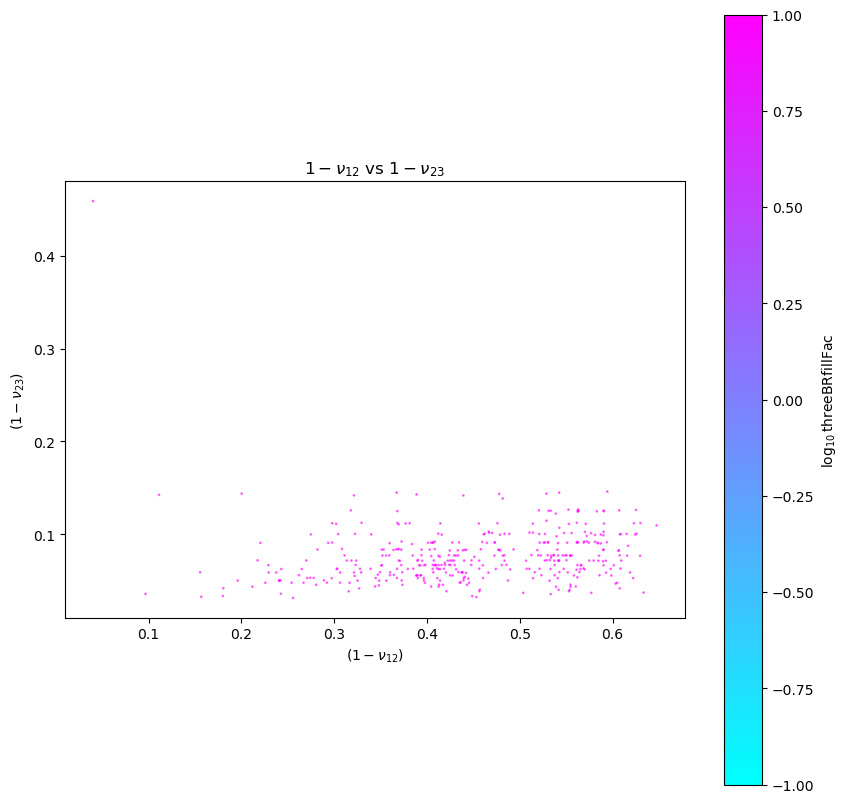

In [79]:
vmi = -1
vma = 1
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(1-specific['nu12'], 1-specific['nu23'], s=1, alpha = 0.5, c=np.log(specific['threeBRfillfac']), cmap="cool", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$(1-\nu_{12})$')
ax.set_ylabel(r'$(1-\nu_{23})$')

ax.set_aspect('equal')
# ax.set_xlim(2e-2,0)
# ax.set_ylim(2e-2,0)
ax.set_title(r'$1-\nu_{12}$ vs $1-\nu_{23}$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label=r'$\log_{10}$threeBRfillFac')

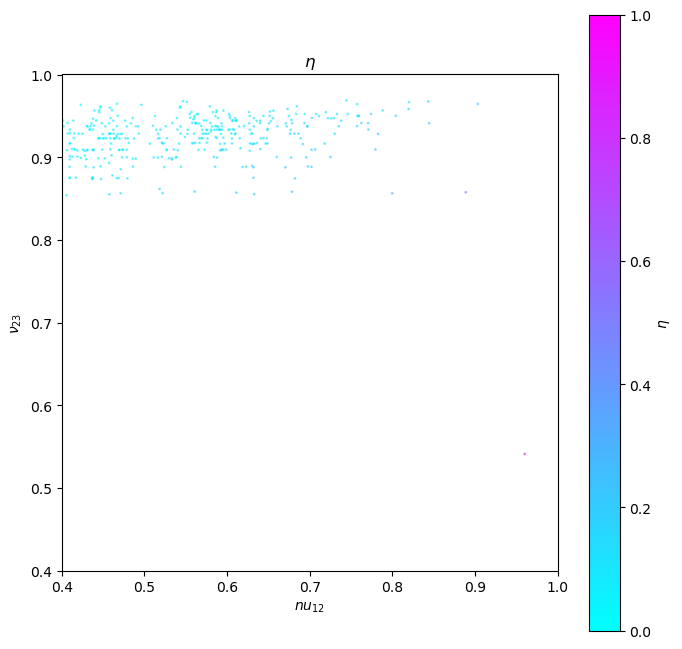

In [29]:
vmi = 0
vma = 1
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(specific['nu12'], specific['nu23'], s=1, alpha = 0.5, c=specific['eta'], cmap="cool", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$nu_{12}$')
ax.set_ylabel(r'$\nu_{23}$')

ax.set_aspect('equal')
ax.set_xlim(0.4,1)
ax.set_ylim(0.4,1)
ax.set_title(r'$\eta$')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label=r'$\eta$')

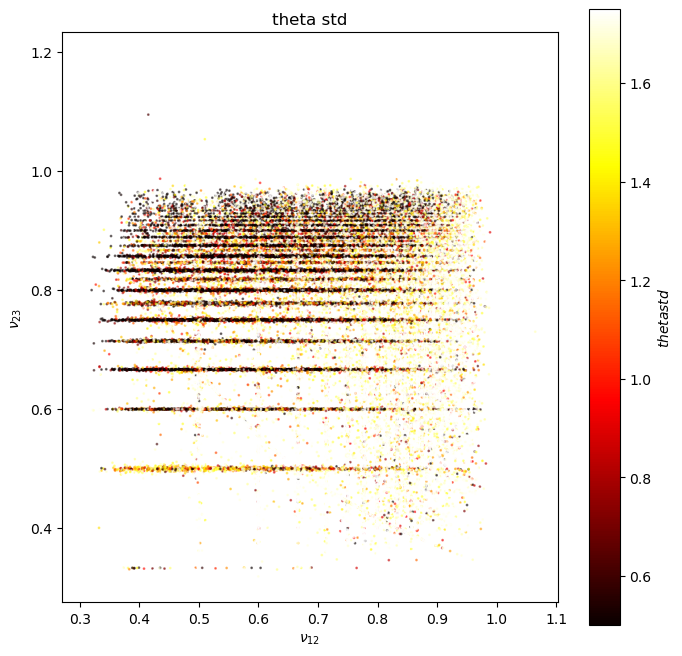

In [ ]:
vmi = 0.5
vma = 1.75
fig, ax = plt.subplots(figsize=(8,8))
#vmi = np.min(data['nu'])

ax.scatter(data['nu12'], data['nu23'], s=1, alpha = 0.5, c=data['nearThetaSTD'], cmap="hot", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\nu_{12}$')
ax.set_ylabel(r'$\nu_{23}$')

ax.set_aspect('equal')
# ax.set_xlim(2e-2,0)
# ax.set_ylim(2e-2,0)
ax.set_title(r'theta std')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='hot'),
             ax=ax, orientation='vertical', label=r'$theta std$')

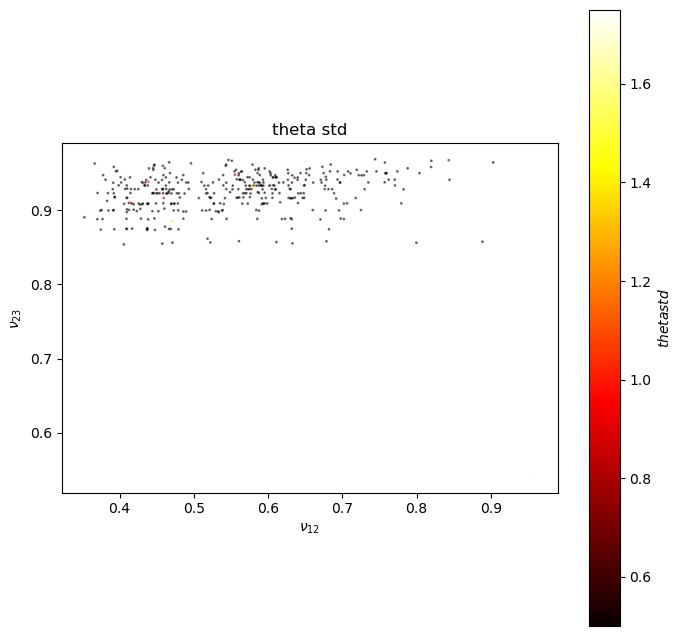

In [34]:
vmi = 0.5
vma = 1.75
fig, ax = plt.subplots(figsize=(8,8))
#vmi = np.min(data['nu'])

ax.scatter(specific['nu12'], specific['nu23'], s=1, alpha = 0.5, c=specific['nearThetaSTD'], cmap="hot", vmin=vmi,vmax=vma)
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\nu_{12}$')
ax.set_ylabel(r'$\nu_{23}$')

ax.set_aspect('equal')
# ax.set_xlim(2e-2,0)
# ax.set_ylim(2e-2,0)
ax.set_title(r'theta std')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='hot'),
             ax=ax, orientation='vertical', label=r'$theta std$')

In [56]:
etadata = data[(data['eta'] < 0.1) | (data['eta'] >0.9 )]


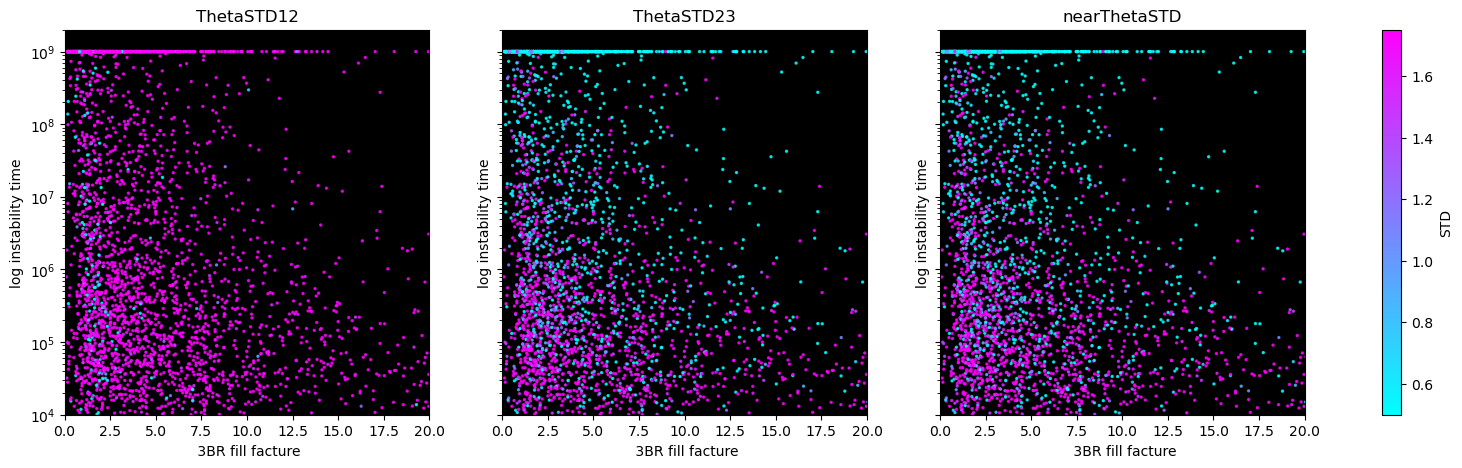

In [57]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
vmi = 0.5
vma = 1.75

tags =[ 'ThetaSTD12', 'ThetaSTD23','nearThetaSTD']

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='STD')
for i, e in enumerate(tags):
    ax[i].scatter((etadata['threeBRfillfac']),(etadata['instability_time']), 
           s=2, c=((etadata[e])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
   
    ax[i].set_xlim([0,20])
    ax[i].set_ylim([1e4,2e9])
    ax[i].set_xlabel(" 3BR fill facture")
    ax[i].set_ylabel("log instability time")
    ax[i].set_yscale('log')
    #cbar.set_label('close body conjunction angle std')
    ax[i].set_facecolor("black")
    ax[i].set_title(e)

3br fill fac good approx if not very asymetric aka if eta close to 0.5

dont use eta since not symetric, so use just period ratios, see pic on phone,
use 3br fill fac for one quadrent
use 2br version for the top left bottom right
cut of at nu12 0.5 and nu23 0.5
becaus ebeyond that there are no strong first order resonenses